## The problem at hand is a supervised multiclass classification learning problem. As the data is in text form, we could try few algorithms which are known to work well in such settings

#### The algorithms to be tried are
1. Naive Bayes - Bernoulli
2. Naive Bayes - Multinomial
3. Random Forest
4. SVM - Linear
5. SVM - Non Linear (not applied as it takes long time to run and accuracy is not impresseive - codes are available)
6. Logistic Regression

In [ ]:
# Importing the requisite libraries
import os
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt



#Converting the json files to dataframes
#with open('train.json', 'r') as f:
    #data = json.load(f)
#df_train = pd.DataFrame(data)

df_train = pd.read_json('../input/train.json')

df_train['ingredients'] = df_train['ingredients'].astype('str') 

df_test = pd.read_json('../input/test.json')

df_test['ingredients'] = df_test['ingredients'].astype('str')

In [ ]:
#checking the dataframes
df_train.head()


In [ ]:
df_train.dtypes

In [ ]:
df_test.head()

In [ ]:
# Exploring the training dataset
print("The data-set has %d rows and %d columns"%(df_train.shape[0],df_train.shape[1]))

In [ ]:
# Exploring the testing dataset
print("The data-set has %d rows and %d columns"%(df_test.shape[0],df_test.shape[1]))

In [ ]:
# Checking the number of categories for cuisine in the tranining data
category_counter={x:0 for x in set(df_train['cuisine'])}
for each_cat in df_train['cuisine']:
    category_counter[each_cat]+=1

print(category_counter)


In [ ]:
#corpus means collection of text. For this particular data-set, in our case it is Review_text

corpus=df_train.ingredients
corpus

In [ ]:
#Initializing TFIDF vectorizer to conver the raw corpus to a matrix of TFIDF features and also enabling the removal of stopwords.
no_features = 10000
vectorizer = TfidfVectorizer(max_df=0.70, min_df=0.0001, max_features=no_features, stop_words='english',ngram_range=(1,2))

In [ ]:
#creating TFIDF features sparse matrix by fitting it on the specified corpus
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
#grabbing the name of the features.
tfidf_names=vectorizer.get_feature_names()

print("Number of TFIDF Features: %d"%len(tfidf_names)) #same info can be gathered by using tfidf_matrix.shape

In [ ]:
# Training data split into training and test data set using 60-40% ratio 

#considering the TFIDF features as independent variables to be input to the classifier

variables = tfidf_matrix

#considering the category values as the class labels for the classifier.

labels = df_train.cuisine

#splitting the data into random training and test sets for both independent variables and labels.

variables_train, variables_test, labels_train, labels_test  =   train_test_split(variables, labels, test_size=.2)

In [ ]:
#analyzing the shape of the training and test data-set:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

In [ ]:
#Applying Naive Bayes:

#initializing the object

bnb_classifier=BernoulliNB()

#fitting the classifier or training the classifier on the training data
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)

#after the model has been trained, we proceed to test its performance on the test data
bnb_predictions=bnb_classifier.predict(variables_test)

#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)

print("Bernoulli Naive Bayes Accuracy Score:  %f" %(nb_ascore))

In [ ]:
#Applying Multinomial Naive Bayes:

#initializing the object
mn_bayes=MultinomialNB()

#fitting the classifier or training the classifier on the training data
mn_bayes_fit=mn_bayes.fit(variables_train,labels_train)

#after the model has been trained, we proceed to test its performance on the test data
prediction_mn=mn_bayes_fit.predict(variables_test)

#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:
mn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn) 

print("Accuracy Score of Multi-Nomial Naive Bayes: %f" %(mn_ascore))

In [ ]:
#Applying Random Forest Classifier:

#initializing the object
rf_classifier=RandomForestClassifier(n_estimators=200)

#fitting the classifier or training the classifier on the training data
rf_classifier=rf_classifier.fit(variables_train,labels_train)

#after the model has been trained, we proceed to test its performance on the test data
rf_predictions=rf_classifier.predict(variables_test)

#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:
rf_ascore=sklearn.metrics.accuracy_score(labels_test, rf_predictions)

print ("Accuracy Score of Random Forests Classifier: %f" %(rf_ascore))


#Applying Xtreme Gradient Boosting Classifier: (converted to markdown coz takes lot of time to train)

#initializing the object
XGB_classifier = XGBClassifier()

#fitting the classifier or training the classifier on the training data
XGB_classifier=XGB_classifier.fit(variables_train, labels_train)

#after the model has been trained, we proceed to test its performance on the test data
XGB_predictions=XGB_classifier.predict(variables_test)

#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:

XGB_ascore=sklearn.metrics.accuracy_score(labels_test, XGB_predictions)

print ("Accuracy Score of Linear SVM Classifier: %f" %(XGB_ascore))


In [ ]:
#Applying Linear Classifier (SVM) using Stochastic Gradient Descent

#initializing the object
svm_classifier=linear_model.SGDClassifier(loss='modified_huber',alpha=0.0001)

#fitting the classifier or training the classifier on the training data
svm_classifier=svm_classifier.fit(variables_train, labels_train)

#after the model has been trained, we proceed to test its performance on the test data
svm_predictions=svm_classifier.predict(variables_test)

#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:

svm_ascore=sklearn.metrics.accuracy_score(labels_test, svm_predictions)

print ("Accuracy Score of Linear SVM Classifier: %f" %(svm_ascore))



In [ ]:
#Applying Logistic Regression

#initializing the object
Logreg_classifier= LogisticRegression(random_state=0)

#fitting the classifier or training the classifier on the training data
Logreg_classifier=Logreg_classifier.fit(variables_train, labels_train)

#after the model has been trained, we proceed to test its performance on the test data
Logreg_predictions=Logreg_classifier.predict(variables_test)

#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:

Logreg_ascore=sklearn.metrics.accuracy_score(labels_test, Logreg_predictions)

print ("Accuracy Score of Logistic Regression Classifier: %f" %(Logreg_ascore))

#### Here is the code for implementing SVM non linear model, it has been converted to mark down becuase, it takes hours to execute and the accuracy is also lower
#### But people can try playing with values of "C", "gamma" or try changing the "kernel" to improve performance



Applying Non Linear Classifier (SVM) using Stochastic Gradient Descent

initializing the object
nl_svm_classifier=SVC(C=1.0, gamma='auto', kernel='rbf')

fitting the classifier or training the classifier on the training data
nl_svm_classifier=nl_svm_classifier.fit(variables_train,labels_train)

after the model has been trained, we proceed to test its performance on the test data
nl_svm_predictions=nl_svm_classifier.predict(variables_test)

the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
there are a number of metrics that can be used as follows:

nl_svm_ascore=sklearn.metrics.accuracy_score(labels_test, nl_svm_predictions)

print ("Accuracy Score of Non Linear SVM Classifier: %f" %(nl_svm_ascore))

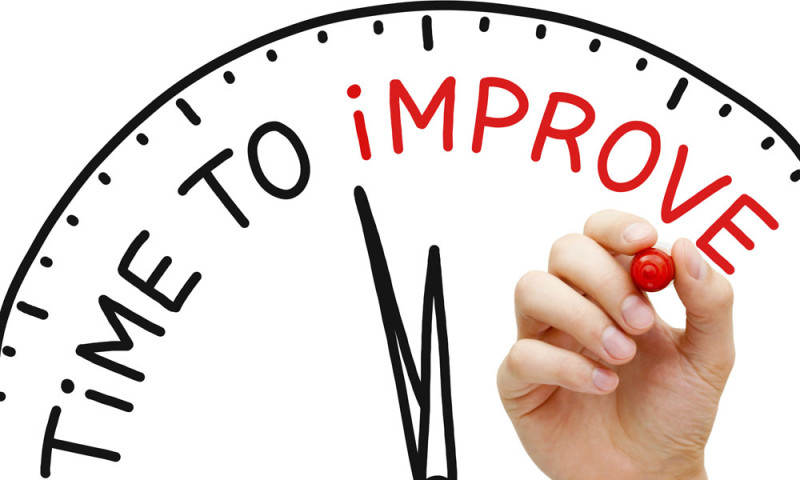

In [ ]:
#now we have seen that with all the algorithms that we have tried and with all the parameter tuning 
# we have tried the maximum accurcy hovers around 76%. 
#The options are - Try ensembling the models already trained to see if the accuracy improves
#                - Try cleaning up data and try data pre-processing to see if the accuracy improves



In [ ]:
# Picking up the models that have shown highest accuracy for ensembling

ensemble_classifier = VotingClassifier(estimators=[('LR',Logreg_classifier),('RF',rf_classifier), ('SVML',svm_classifier)],
                        voting='soft',
                        weights=[2,1,4])

#fitting the classifier or training the classifier on the training data
ensemble_classifier = ensemble_classifier.fit(variables_train, labels_train)

#after the model has been trained, we proceed to test its performance on the test data
ensemble_predictions = ensemble_classifier.predict(variables_test)

#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:

ensemble_ascore=sklearn.metrics.accuracy_score(labels_test, ensemble_predictions)

print ("Accuracy Score of Ensemble Classifier: %f" %(ensemble_ascore))

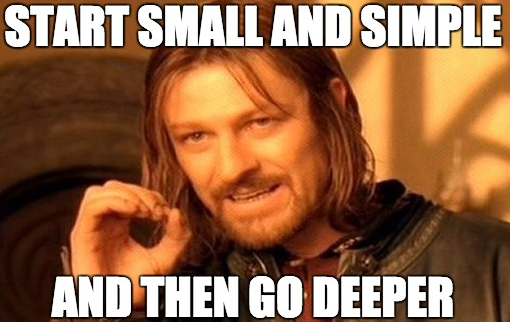

In [ ]:
# Now that we have tried most of the ML algorithms, we could try deep learning models now to see if we can increase the accuracy
# Below codes are sourced from https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
# Importing all the necessary libraries

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df_train.head()

In [ ]:
# Check class distributions
df_train.cuisine.value_counts()

In [ ]:
# Convert Cuisines to integers as most of the machine learning models deal with integer or float
df_train['cuisine'] = df_train.cuisine.astype('category').cat.codes

In [ ]:
# For a deep learning model we need to know what the input sequence length for our model should be
# Calculate the number of words in the ingredients column and find the maximum value to be used for input sequence

df_train['num_words'] = df_train.ingredients.apply(lambda x : len(x.split()))

df_train['num_words'].max()

In [ ]:
# Set number of classes and target variable
num_class = len(np.unique(df_train.cuisine.values))
y = df_train['cuisine'].values

In [ ]:
#Tokenize the input
MAX_LENGTH = 137
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.ingredients.values)
post_seq = tokenizer.texts_to_sequences(df_train.ingredients.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Creating a train test split with 30% in testing data set
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.05)

In [ ]:
# Deep Learning Model : Simple
# Let start with a simple model where the build an embedded layer, Dense followed by our prediction

inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            200,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(64, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.20, 
          shuffle=True, epochs=5, callbacks=[checkpointer])

In [ ]:
# Deep Learning Model : Recurrent Neural Networks with LSTM cells

inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            200,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(72)(embedding_layer)
x = Dense(64, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.20, 
          shuffle=True, epochs=7, callbacks=[checkpointer])


In [ ]:
#Lets look at prediction accuracy
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

In [ ]:
#Predicting on the test data 

#Preparing the TF-IDF out of the test data

corpus1=df_test['ingredients']

tfidf_matrix1=vectorizer.transform(corpus1).todense()

variables1 = tfidf_matrix1

Ens_Test_predictions = ensemble_classifier.predict(variables1)

test_id = df_test['id']

sub_file = pd.DataFrame({'id': test_id, 'cuisine': Ens_Test_predictions}, columns=['id', 'cuisine'])

sub_file.to_csv('seventh_sub.csv', index=False)


In [ ]:
sub_file.head()